<a href="https://colab.research.google.com/github/LeeYoungSeo1/CFD_foundation/blob/main/week2_high_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha = 1.0
Nx = 51
L = 1.0
dx = L / (Nx - 1)
x = np.linspace(0, L, Nx)
T_left, T_right = 0.0, 0.0

In [3]:
def explicit_euler_heat(T_init, Nt, r):
  T=T_init.copy()
  for i in range(Nt):
    Tn=T.copy()
    T[1:-1]=Tn[1:-1]+r*(Tn[2:]-2*Tn[1:-1]+Tn[:-2])
    T[0]=T_left
    T[-1]=T_right
  return T

In [4]:
m = 20  # higher m -> shorter wavelength (more "worst-case"-like)
T0 = np.sin(m * np.pi * x / L)
T0[0]  = T_left
T0[-1] = T_right

In [5]:
r_list = [0.10, 0.49, 0.60]  # stable, near-limit, unstable
Nt = 100

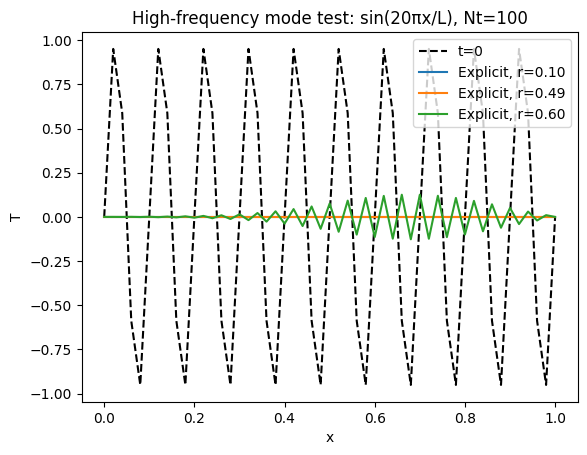

In [6]:
plt.figure()
plt.plot(x, T0, "k--", label="t=0")
for r in r_list:
    T_end = explicit_euler_heat(T0, Nt=Nt, r=r)
    plt.plot(x, T_end, label=f"Explicit, r={r:.2f}")

plt.title(f"High-frequency mode test: sin({m}πx/L), Nt={Nt}")
plt.xlabel("x")
plt.ylabel("T")
plt.legend()
plt.show()